In [1]:
what_were_covering = {1:'data (prepare and load)',
                      2:'build model',
                      3:'fitting the model to data(traning)',
                      4:'making predictions and evaluting a model (inference)',
                      5:'saving and loading a model',
                      6:'putting it all together'}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(traning)',
 4: 'making predictions and evaluting a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [96]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt
import numpy as np

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.

* Excel speadsheet
* Image of any kind
* Videos (YouTube has lots of data...)
* Audio like songs or podcasts
* DNA 
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with *known* **parameters**.

In [3]:
# create *known* parameters
weight = 0.7
bias = 0.3

# create 
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10]

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])

In [5]:
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [6]:
len(X), len(y)

(50, 50)

### Splitting data into training and test sets (one of the most important concepts in machine learning in general)
Let's create a training and test set with our data.

In [7]:
# create a train/test split
train_split = int(0.8 * len(X))
train_split

40

In [8]:
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test) 

(40, 40, 10, 10)

How might we better  visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize"

In [9]:
def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # are there predictions?
    if predictions is not None:
        # plot the predictions
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    # show the legend
    plt.legend(prop={'size':14})

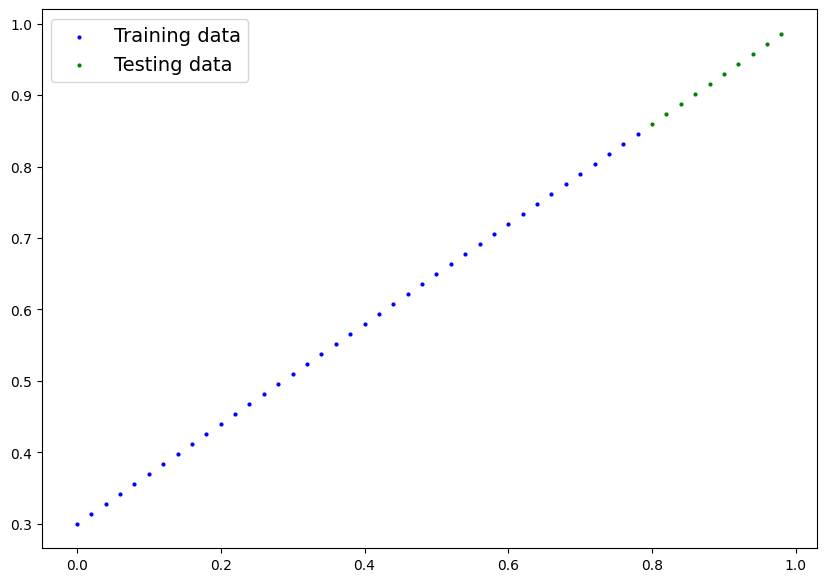

In [10]:
plot_predictions()

## 2. Build model

our first pytorch model!

what our model does:
* Start with random values (weight & bias)
* Look at training data and adjust the random values to better represent  (or get closer to ) the ideal values (the weight & bias values we used to create the data )

How does it do so?
1. Gradient decent
2. Backpropagation

In [11]:
from torch import nn

# Create  linear regression model class 
class linearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        # Forward method to define the computaion in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all of the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTroch layer from torch.nn will set this for us
* torch.nn.Module - the base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this were the optimizers in PyTorch live, they will help with gradient descent
* def forward() - all nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

### Checking the contents of our PyTorch model

Now we 've created a model, let's see what's inside...

So we can check our model paramters or what's inside our model using `.parameters()`

In [138]:
# create a random seed
torch.manual_seed(123)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = linearRegressionModel()

In [139]:
model_0

linearRegressionModel()

In [140]:
# check our the parameters
model_0.parameters()

<generator object Module.parameters at 0x7f34ed5ccc10>

In [141]:
list(model_0.parameters())

[Parameter containing:
 tensor([-0.1115], requires_grad=True),
 Parameter containing:
 tensor([0.1204], requires_grad=True)]

In [142]:
# list named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([-0.1115])), ('bias', tensor([0.1204]))])

### Making prediction using `torch.inference_mode()`

To check our model's prediction power, let's see how well it predicts `y_test` based on `x_test`

when we pass data through our model, it's going to run it through the `forward()` method.

In [143]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(x_test)
    
y_preds

tensor([[0.0312],
        [0.0290],
        [0.0267],
        [0.0245],
        [0.0223],
        [0.0200],
        [0.0178],
        [0.0156],
        [0.0134],
        [0.0111]])

In [144]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

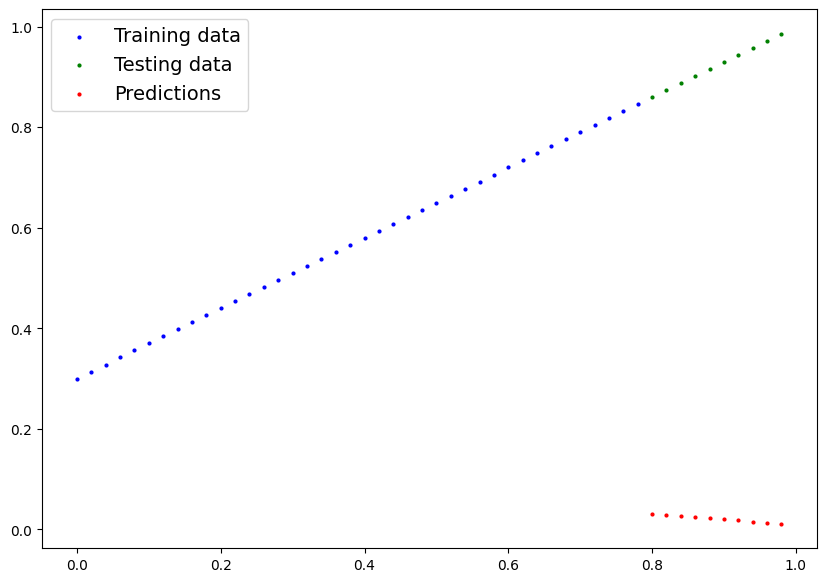

In [145]:
plot_predictions(predictions=y_preds)

In [146]:
# we can also do someting similar with toch.no_grad(), however, torch.inference_mode() is preferred
# with torch.no_grad():
#    y_preds = model_0(x_test)


## 3. Train model

the whole idea of training is for a model to move from some *unknown* parameters (these may be random) to some *known* parameters.
Or in other words from a poor representation of the data to a better representation of the data.

one way to measure how poor or how wrong is your model predictions are is to use a loss function.

* Note : Loss function may also be called cost function or criterion in different areas. For our case, we 're going to refer to it as loss function.

Thing we need to train:

* **Loss function:** A function to measure how wrong is you model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes it to account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to imporve the loss function.

    - inside the optimizer you 'll often have to set two parameters:
        - `params` - the model parameters you 'd like to optimize, for example `params=modle_0.parameters()`
        - `lr` (learning rate) - the learning rate is a hyperparamter that define how big/small the optimizer changes the parameters
        with each step (a small `lr` results in small changes, a large `lr` results in large changes)

And specifically for PyTorch, we need:
* A traning loop 
* A testing loop 

In [147]:
# check out our model parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([-0.1115])), ('bias', tensor([0.1204]))])

In [148]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup a optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01) # lr = learning rate : possibly the most important hyperparameter you can set

**Q:** Which loss function and optimizer should i use?

**A:** This will be problem specific. But with experince, you 'll get an idea of what works and what doesn't with your particular prblem set.

For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classfying whether a photo is of a dog or a cat, you 'll likely want tu use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop)

A couple of thing we need in a training loop:
0. Loop through the data and do...
1. Forward pass (this involves data moving through our model's `forward()` function) to make predictions on data - also called forward propagation
2. Caculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the netwrok to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient descent**)

In [149]:
model_0.state_dict()

OrderedDict([('weights', tensor([-0.1115])), ('bias', tensor([0.1204]))])

In [24]:
torch.manual_seed(123)

# An epoch is one loop through the data...(this is a hyperparameters because we 've set it ourselves)
epochs = 1

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to train mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f'Loss: {loss}')

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_0.eval() # turns off gradient tracking 

    # print out model state_dict()
    print(model_0.state_dict())

Loss: 0.4961091876029968
OrderedDict([('weights', tensor([-0.1076])), ('bias', tensor([0.1304]))])


In [45]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

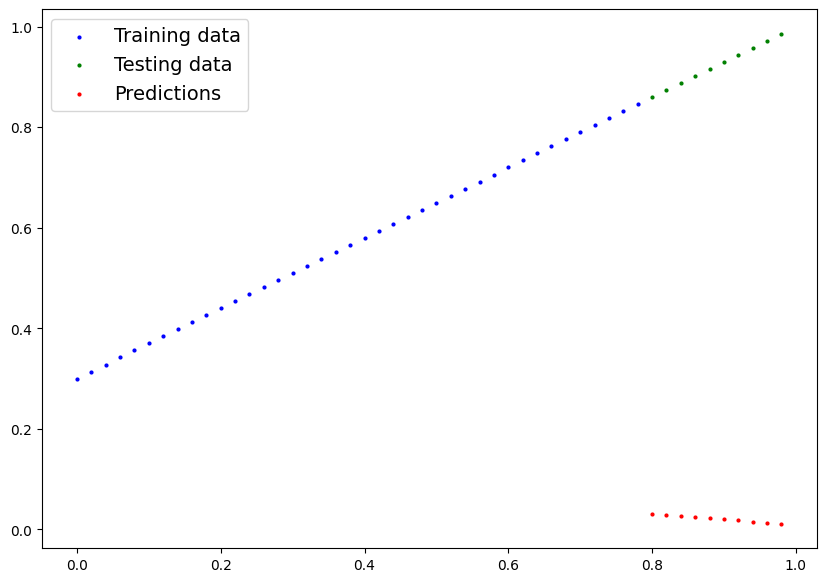

In [46]:
plot_predictions(predictions=y_preds_new)

In [47]:
torch.manual_seed(123)

# An epoch is one loop through the data...(this is a hyperparameters because we 've set it ourselves)
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to train mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)
    print(f'Loss: {loss}')

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    # print out model state_dict()
    print(model_0.state_dict())

Loss: 0.4961091876029968
OrderedDict([('weights', tensor([-0.1076])), ('bias', tensor([0.1304]))])
Loss: 0.4845882058143616
OrderedDict([('weights', tensor([-0.1037])), ('bias', tensor([0.1404]))])
Loss: 0.4730672240257263
OrderedDict([('weights', tensor([-0.0998])), ('bias', tensor([0.1504]))])
Loss: 0.46154624223709106
OrderedDict([('weights', tensor([-0.0959])), ('bias', tensor([0.1604]))])
Loss: 0.4500252306461334
OrderedDict([('weights', tensor([-0.0920])), ('bias', tensor([0.1704]))])
Loss: 0.4385042190551758
OrderedDict([('weights', tensor([-0.0881])), ('bias', tensor([0.1804]))])
Loss: 0.42698320746421814
OrderedDict([('weights', tensor([-0.0842])), ('bias', tensor([0.1904]))])
Loss: 0.4154621958732605
OrderedDict([('weights', tensor([-0.0803])), ('bias', tensor([0.2004]))])
Loss: 0.40394121408462524
OrderedDict([('weights', tensor([-0.0764])), ('bias', tensor([0.2104]))])
Loss: 0.3924202024936676
OrderedDict([('weights', tensor([-0.0725])), ('bias', tensor([0.2204]))])
Loss: 0

In [48]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

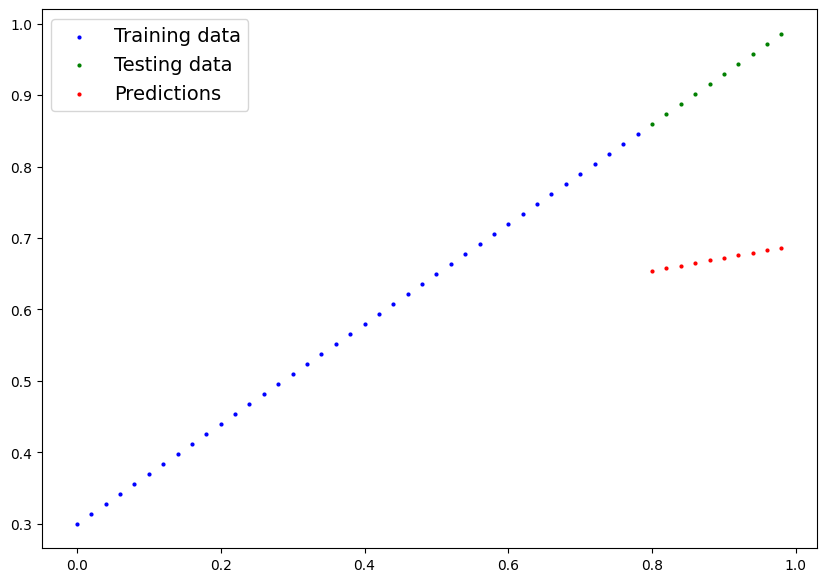

In [49]:
plot_predictions(predictions=y_preds_new)

In [61]:
from cgi import test


torch.manual_seed(123)

# An epoch is one loop through the data...(this is a hyperparameters because we 've set it ourselves)
epochs = 100

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to train mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testin
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # with torch.no_grad(): # you may also see torch.no_grad() in order PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(x_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    # print out what's happenin'
    if epoch % 10 == 0:
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
        # print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.03529027849435806 | Test loss: 0.0819123387336731
OrderedDict([('weights', tensor([0.5261])), ('bias', tensor([0.3729]))])
Epoch: 10 | Loss: 0.0318564809858799 | Test loss: 0.07363979518413544
OrderedDict([('weights', tensor([0.5433])), ('bias', tensor([0.3659]))])
Epoch: 20 | Loss: 0.0284176804125309 | Test loss: 0.06536726653575897
OrderedDict([('weights', tensor([0.5604])), ('bias', tensor([0.3589]))])
Epoch: 30 | Loss: 0.024988343939185143 | Test loss: 0.05778159946203232
OrderedDict([('weights', tensor([0.5774])), ('bias', tensor([0.3514]))])
Epoch: 40 | Loss: 0.021552862599492073 | Test loss: 0.04950905591249466
OrderedDict([('weights', tensor([0.5945])), ('bias', tensor([0.3444]))])
Epoch: 50 | Loss: 0.018114853650331497 | Test loss: 0.04192338511347771
OrderedDict([('weights', tensor([0.6115])), ('bias', tensor([0.3369]))])
Epoch: 60 | Loss: 0.014686408452689648 | Test loss: 0.03365085646510124
OrderedDict([('weights', tensor([0.6286])), ('bias', tensor([0.32

In [62]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6964])), ('bias', tensor([0.3064]))])

In [63]:
weight, bias

(0.7, 0.3)

In [64]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

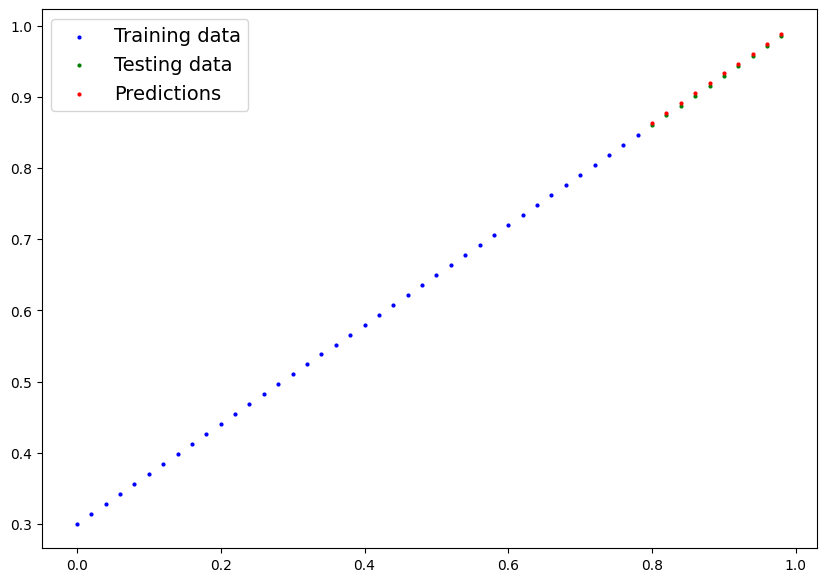

In [65]:
plot_predictions(predictions=y_preds_new)

In [150]:
from cgi import test


torch.manual_seed(123)

# An epoch is one loop through the data...(this is a hyperparameters because we 've set it ourselves)
epochs = 350

epoch_count = []
loss_values = []
test_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to train mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients
    
    # 1. Forward pass
    y_pred = model_0(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default how the optimizer changes will acculumate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testin
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/batch norm layers)
    with torch.inference_mode(): # turns off gradient tracking & a couple more things behind the scenes
    # with torch.no_grad(): # you may also see torch.no_grad() in order PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(x_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)
    # print out what's happenin'
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}')
        # print out model state_dict()
        print(model_0.state_dict())

Epoch: 0 | Loss: 0.4961091876029968 | Test loss: 0.8883718252182007
OrderedDict([('weights', tensor([-0.1076])), ('bias', tensor([0.1304]))])
Epoch: 10 | Loss: 0.3808991611003876 | Test loss: 0.7536616921424866
OrderedDict([('weights', tensor([-0.0686])), ('bias', tensor([0.2304]))])
Epoch: 20 | Loss: 0.267892062664032 | Test loss: 0.6209607124328613
OrderedDict([('weights', tensor([-0.0296])), ('bias', tensor([0.3284]))])
Epoch: 30 | Loss: 0.19329790771007538 | Test loss: 0.5122742652893066
OrderedDict([('weights', tensor([0.0083])), ('bias', tensor([0.4034]))])
Epoch: 40 | Loss: 0.15404292941093445 | Test loss: 0.4310603141784668
OrderedDict([('weights', tensor([0.0428])), ('bias', tensor([0.4539]))])
Epoch: 50 | Loss: 0.13377928733825684 | Test loss: 0.3726288676261902
OrderedDict([('weights', tensor([0.0730])), ('bias', tensor([0.4854]))])
Epoch: 60 | Loss: 0.12280428409576416 | Test loss: 0.3305349349975586
OrderedDict([('weights', tensor([0.0996])), ('bias', tensor([0.5039]))])
E

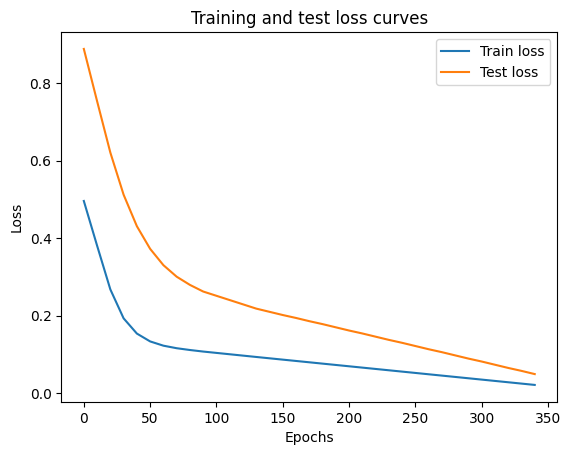

In [151]:
# Plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label='Train loss')
plt.plot(epoch_count, test_loss_values, label='Test loss')
plt.title('Training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

In [152]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6099])), ('bias', tensor([0.3379]))])

In [153]:
weight, bias

(0.7, 0.3)

In [154]:
with torch.inference_mode():
    y_preds_new = model_0(x_test)

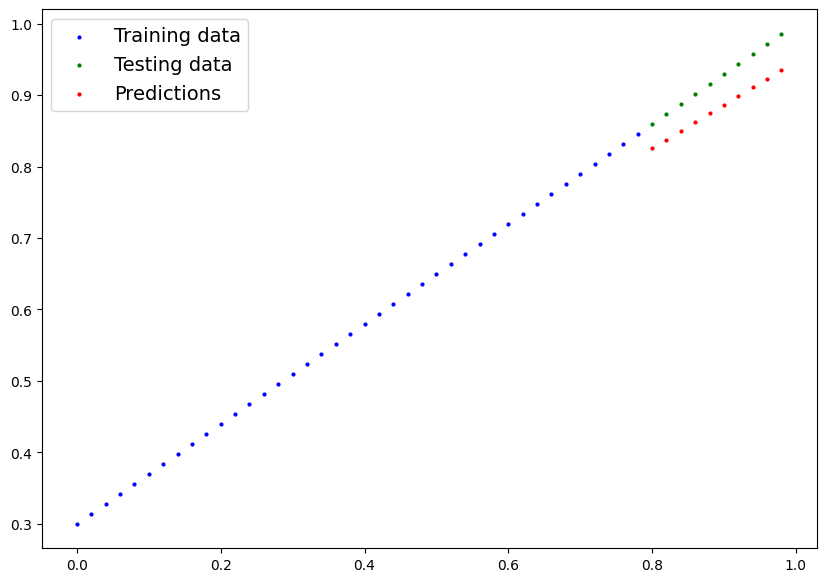

In [155]:
plot_predictions(predictions=y_preds_new)

## 4. Saving a model in PyTorch

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` - allows you save a PyTorch object in python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.module.load_state_dict()` - allows you to load a model's saved state dictionary

In [159]:
# saving our PyTorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = 'pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f'Saving model to: {MODEL_SAVE_PATH}')
torch.save(obj=model_0.state_dict(),f=MODEL_SAVE_PATH)

Saving model to: models/pytorch_workflow_model_0.pth


## 5. Loading a PyTorch model

Since we saved our model's `state_dict()` rather the entier model, we 'll create a new instance of our model class and load the saved `state_dict()` into that.

In [160]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6099])), ('bias', tensor([0.3379]))])

In [161]:
# To load in a saved state_dict we have to instantiate a new instance of our model class 
loaded_model_0 = linearRegressionModel()

In [162]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([-0.1115])), ('bias', tensor([0.1204]))])

In [163]:
# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [164]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6099])), ('bias', tensor([0.3379]))])

In [165]:
# Make some predictions with our loaded model
loaded_model_0.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)

loaded_model_preds

tensor([[0.8258],
        [0.8380],
        [0.8502],
        [0.8624],
        [0.8746],
        [0.8868],
        [0.8990],
        [0.9112],
        [0.9234],
        [0.9356]])

In [167]:
# Make some model preds
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(x_test)

y_preds

tensor([[0.8258],
        [0.8380],
        [0.8502],
        [0.8624],
        [0.8746],
        [0.8868],
        [0.8990],
        [0.9112],
        [0.9234],
        [0.9356]])

In [168]:
# Compare loaded model preds with  original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together

In [169]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

Create device-agnostic code.

This means if we've got access to a GPU, our code will use it(for potentially faster computing).

if no GPU is available, the code will default to use CPU.

In [170]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'using device: {device}')

using device: cuda


### 6.1 data

In [186]:
# create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, error will pop up
y = weight * X + bias

# split data
train_split = int(0.8 * len(X))
x_train, y_train = X[:train_split], y[:train_split]
x_test, y_test = X[train_split:], y[train_split:]

def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(6, 3))
    
    # plot training data in blue
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')

    # plot test data in green
    plt.scatter(test_data, test_labels, c='g', s=4, label='Testing data')

    # are there predictions?
    if predictions is not None:
        # plot the predictions
        plt.scatter(test_data, predictions, c='r', s=4, label='Predictions')
    
    # show the legend
    plt.legend(prop={'size'8})

SyntaxError: invalid syntax. Perhaps you forgot a comma? (4173715937.py, line 37)

### 6.2 Building a PyTorch linear model

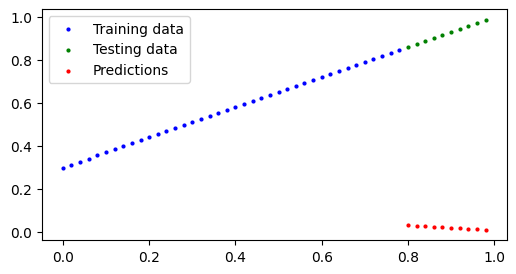

In [187]:
# Create  linear regression model class 
class linearRegressionModel(nn.Module): # <- almost everything in PyTorch inherhits from nn.Module
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

        # Forward method to define the computaion in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return self.weights * x + self.bias # this is the linear regression formula

# create a random seed
torch.manual_seed(123)

# create an instance of the model (this is a subclass of nn.Module)
model_0 = linearRegressionModel()

# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(x_test)

plot_predictions(predictions=y_preds)